<a href="https://colab.research.google.com/github/gergess/WineQuality-Red-PyCaret/blob/main/SamuelGerges_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook was created by Samuel Gerges. 
The data used for research is the Wine Quality (Red Wine) 

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.utils import enable_colab

enable_colab()

Colab mode enabled.


In [ ]:
import os
from six.moves import urllib

DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
WINE_QUALITY_PATH = os.path.join("wine_quality-red")
WINE_QUALITY_URL = DOWNLOAD_ROOT + "winequality-red"

def fetch_wine_data(wine_quality_url=WINE_QUALITY_URL, wine_quality_path=WINE_QUALITY_PATH):
    if not os.path.isdir(wine_quality_path):
        os.makedirs(wine_quality_path)
    csv_path = os.path.join(wine_quality_path, "winequality-red.csv")
    print(wine_quality_url)
    urllib.request.urlretrieve(wine_quality_url, csv_path)

fetch_wine_data()

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red


In [ ]:
import pandas as pd

def load_wine_data(wine_quality_path=WINE_QUALITY_PATH):
    csv_path = os.path.join(wine_quality_path, "winequality-red.csv")
    return pd.read_csv(csv_path, sep=';')

In [ ]:
wine_data = load_wine_data()
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data = wine_data.sample(frac=0.9, random_state=786)
data_unseen = wine_data.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1439, 12)
Unseen Data For Predictions: (160, 12)


In [ ]:
from pycaret.regression import *

exp_reg101 = setup(data = data, target = 'alcohol', session_id=123) 

,Description,Value
0,session_id,123
1,Target,alcohol
2,Original Data,"(1439, 12)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1007, 16)"


In [ ]:
best = compare_models(exclude=['ransac'], sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3599,0.2786,0.5236,0.7496,0.0449,0.0342,0.078
gbr,Gradient Boosting Regressor,0.4023,0.3071,0.5504,0.7226,0.0471,0.0383,0.159
rf,Random Forest Regressor,0.3881,0.3085,0.5523,0.7227,0.0471,0.0368,0.724
et,Extra Trees Regressor,0.3697,0.3120,0.5563,0.7210,0.0473,0.0350,0.561
lr,Linear Regression,0.4652,0.3677,0.6036,0.6665,0.0523,0.0445,0.017
lar,Least Angle Regression,0.4762,0.3952,0.6235,0.6463,0.0541,0.0457,0.021
ada,AdaBoost Regressor,0.5639,0.4922,0.7005,0.5600,0.0604,0.0545,0.142
dt,Decision Tree Regressor,0.4804,0.5606,0.7441,0.4928,0.0637,0.0455,0.027
br,Bayesian Ridge,0.6640,0.7347,0.8545,0.3542,0.0725,0.0628,0.017
ridge,Ridge Regression,0.6643,0.7359,0.8552,0.3533,0.0726,0.0628,0.017


In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3640,0.2605,0.5104,0.7853,0.0439,0.0349
1,0.3211,0.1993,0.4465,0.8256,0.0400,0.0316
2,0.2953,0.1860,0.4312,0.8634,0.0367,0.0280
3,0.4116,0.3764,0.6136,0.5700,0.0528,0.0394
4,0.3679,0.2712,0.5207,0.7478,0.0451,0.0355
5,0.3610,0.4037,0.6353,0.7466,0.0512,0.0327
6,0.3503,0.2486,0.4986,0.7720,0.0433,0.0336
7,0.3241,0.2076,0.4556,0.7971,0.0389,0.0309
8,0.3724,0.2852,0.5340,0.7097,0.0465,0.0356
9,0.4315,0.3478,0.5897,0.6788,0.0503,0.0402


In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4877,0.3931,0.6269,0.6761,0.0541,0.0471
1,0.4457,0.3418,0.5846,0.7009,0.0517,0.0438
2,0.4417,0.3496,0.5913,0.7432,0.0509,0.0421
3,0.4953,0.4405,0.6637,0.4968,0.0572,0.0477
4,0.4042,0.2536,0.5036,0.7641,0.0446,0.0397
5,0.4528,0.3031,0.5505,0.8098,0.0476,0.0425
6,0.5058,0.4423,0.6651,0.5944,0.0573,0.0477
7,0.4070,0.2774,0.5267,0.7289,0.0451,0.0386
8,0.5059,0.4273,0.6537,0.5651,0.0571,0.0482
9,0.5059,0.4488,0.6699,0.5856,0.0579,0.0478


In [ ]:
lar = create_model('lar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4877,0.3931,0.6270,0.6760,0.0541,0.0471
1,0.4457,0.3418,0.5846,0.7009,0.0517,0.0438
2,0.5517,0.6246,0.7903,0.5413,0.0683,0.0535
3,0.4953,0.4405,0.6637,0.4968,0.0572,0.0477
4,0.4042,0.2536,0.5036,0.7641,0.0446,0.0397
5,0.4528,0.3031,0.5505,0.8098,0.0476,0.0425
6,0.5058,0.4423,0.6651,0.5944,0.0573,0.0477
7,0.4070,0.2774,0.5267,0.7289,0.0451,0.0386
8,0.5059,0.4273,0.6537,0.5651,0.0571,0.0482
9,0.5059,0.4488,0.6699,0.5856,0.0579,0.0478


In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4973,0.4134,0.6430,0.6593,0.0549,0.0473
1,0.3948,0.2670,0.5168,0.7663,0.0458,0.0387
2,0.4076,0.2809,0.5300,0.7937,0.0452,0.0387
3,0.4803,0.4286,0.6547,0.5105,0.0565,0.0460
4,0.4407,0.3450,0.5874,0.6791,0.0510,0.0430
5,0.4780,0.5239,0.7238,0.6711,0.0583,0.0432
6,0.4689,0.3806,0.6169,0.6510,0.0527,0.0446
7,0.4163,0.2817,0.5308,0.7246,0.0454,0.0398
8,0.4388,0.3410,0.5839,0.6529,0.0506,0.0419
9,0.4608,0.4043,0.6359,0.6266,0.0540,0.0434


In [ ]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4877,0.3931,0.6269,0.6761,0.0541,0.0471
1,0.4456,0.3418,0.5846,0.7009,0.0517,0.0438
2,0.4417,0.3496,0.5913,0.7432,0.0509,0.0421
3,0.4953,0.4405,0.6637,0.4968,0.0572,0.0477
4,0.4042,0.2536,0.5036,0.7641,0.0446,0.0397
5,0.4528,0.3031,0.5505,0.8098,0.0476,0.0425
6,0.5058,0.4423,0.6651,0.5944,0.0573,0.0477
7,0.4070,0.2774,0.5267,0.7289,0.0451,0.0386
8,0.5059,0.4273,0.6537,0.5651,0.0571,0.0482
9,0.5059,0.4487,0.6699,0.5856,0.0579,0.0478


In [ ]:
tuned_lar = tune_model(lar)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4877,0.3931,0.6270,0.6760,0.0541,0.0471
1,0.4457,0.3418,0.5846,0.7009,0.0517,0.0438
2,0.5523,0.6246,0.7903,0.5413,0.0683,0.0536
3,0.4953,0.4405,0.6637,0.4968,0.0572,0.0477
4,0.4042,0.2536,0.5036,0.7641,0.0446,0.0397
5,0.4528,0.3031,0.5505,0.8098,0.0476,0.0425
6,0.5058,0.4423,0.6651,0.5944,0.0573,0.0477
7,0.4070,0.2774,0.5267,0.7289,0.0451,0.0386
8,0.5059,0.4273,0.6537,0.5651,0.0571,0.0482
9,0.5059,0.4488,0.6699,0.5856,0.0579,0.0478


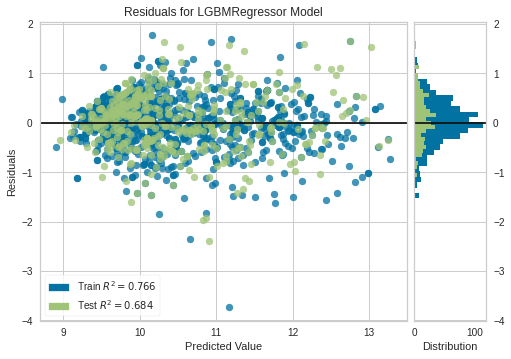

In [ ]:
plot_model(tuned_lightgbm)

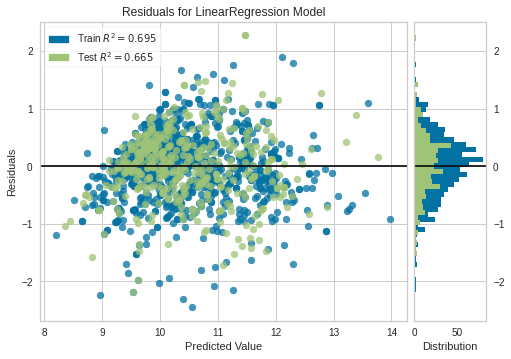

In [ ]:
plot_model(tuned_lr)

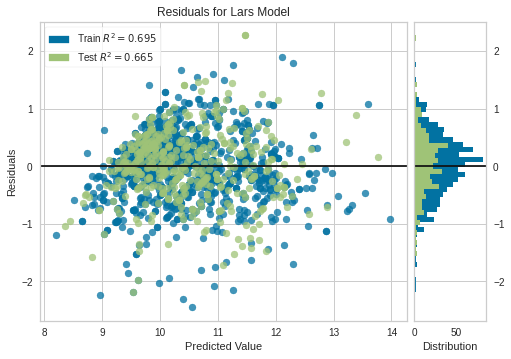

In [ ]:
plot_model(tuned_lar)

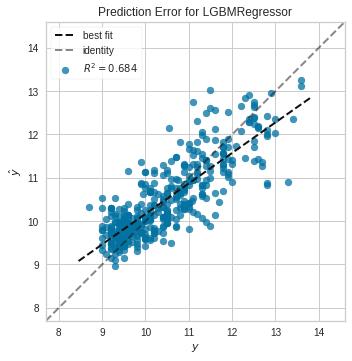

In [ ]:
plot_model(tuned_lightgbm, plot = 'error')

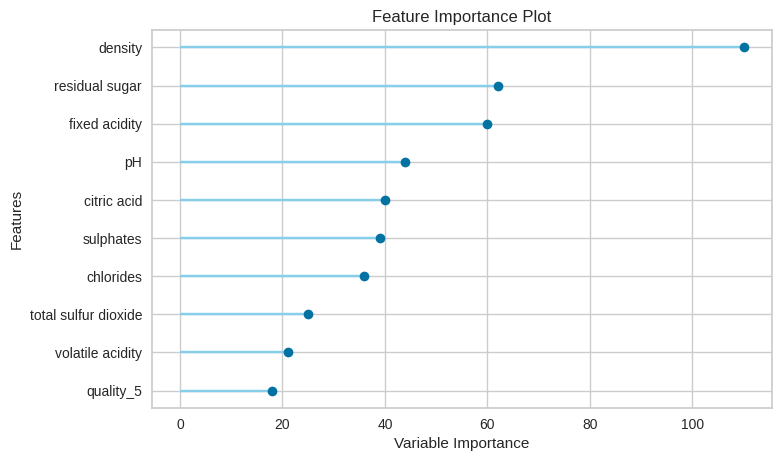

In [ ]:
plot_model(tuned_lightgbm, plot='feature')

In [ ]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.4476,0.3406,0.5836,0.684,0.0499,0.0427


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,alcohol,Label
0,8.1,0.66,0.70,2.2,0.098,25.0,129.0,0.99720,3.08,0.53,0.0,0.0,1.0,0.0,0.0,0.0,9.0,9.615354
1,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,0.0,0.0,0.0,0.0,1.0,0.0,12.4,12.288467
2,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,0.0,0.0,0.0,1.0,0.0,0.0,11.9,11.015125
3,7.9,0.34,0.42,2.0,0.086,8.0,19.0,0.99546,3.35,0.60,0.0,0.0,0.0,1.0,0.0,0.0,11.4,10.836904
4,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,0.0,0.0,0.0,1.0,0.0,0.0,11.1,12.751838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,0.0,0.0,0.0,0.0,1.0,0.0,12.4,12.288467
428,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,0.0,0.0,0.0,1.0,0.0,0.0,10.4,9.716496
429,9.5,0.59,0.44,2.3,0.071,21.0,68.0,0.99920,3.46,0.63,0.0,0.0,1.0,0.0,0.0,0.0,9.5,9.755558
430,6.7,0.54,0.13,2.0,0.076,15.0,36.0,0.99730,3.61,0.64,0.0,0.0,1.0,0.0,0.0,0.0,9.8,9.699185


In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)

print(final_lightgbm)

LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3688,0.2368,0.4866,0.7803,0.0417,0.0353


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,alcohol,Label
0,8.1,0.66,0.70,2.2,0.098,25.0,129.0,0.99720,3.08,0.53,0.0,0.0,1.0,0.0,0.0,0.0,9.0,9.392087
1,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,0.0,0.0,0.0,0.0,1.0,0.0,12.4,12.231649
2,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,0.0,0.0,0.0,1.0,0.0,0.0,11.9,11.274613
3,7.9,0.34,0.42,2.0,0.086,8.0,19.0,0.99546,3.35,0.60,0.0,0.0,0.0,1.0,0.0,0.0,11.4,11.270668
4,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,0.0,0.0,0.0,1.0,0.0,0.0,11.1,12.419979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,0.0,0.0,0.0,0.0,1.0,0.0,12.4,12.231649
428,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,0.0,0.0,0.0,1.0,0.0,0.0,10.4,9.778175
429,9.5,0.59,0.44,2.3,0.071,21.0,68.0,0.99920,3.46,0.63,0.0,0.0,1.0,0.0,0.0,0.0,9.5,9.610178
430,6.7,0.54,0.13,2.0,0.076,15.0,36.0,0.99730,3.61,0.64,0.0,0.0,1.0,0.0,0.0,0.0,9.8,9.753009


In [ ]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,9.520532
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,10.314480
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,9.365015
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,9.241260
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,9.813051


In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.alcohol, unseen_predictions.Label, 'R2')

0.7637

In [ ]:
save_model(final_lightgbm,'Final Lightgbm Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='alcohol',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.4,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=41,
                    

In [ ]:
saved_final_model = load_model('Final Lightgbm Model')
new_prediction = predict_model(saved_final_model, data=data_unseen)
new_prediction.head()

Transformation Pipeline and Model Successfully Loaded


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,9.520532
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,10.314480
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,9.365015
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,9.241260
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,9.813051


In [ ]:
from pycaret.utils import check_metric
check_metric(new_prediction.alcohol, new_prediction.Label, 'R2')

0.7637